# Gathering data

#### Import library 

In [1]:
import pandas as pd
import numpy as np
from requests import get
from io import StringIO

### Reading dataframe

#### Reading csv

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### downloading tsv

In [3]:
tsv = get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
tsv

<Response [200]>

if the response is 200 that means the file is donwload and is in memory

#### Reading tsv

In [4]:
predictions_df = pd.read_csv(StringIO(tsv.content.decode('utf-8')),sep="\t")
predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twiter api

#### Writing tweet_json.txt

In [ ]:
# the following code is form udacity project for "Wrangle and Analyze Data"s Supporting Materials

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


#### Reading tweet_json.txt

In [5]:
import json
with open('tweet-json.txt') as file:
    lines = file.readlines()
    l = list()
    for line in lines:
        j = json.loads(line)
        tweet = dict(Tweet_ID=j['id_str'], Retweet_count=j['retweet_count'], Favorite_count=j['favorite_count'])
        l.append(tweet)
    tweet_df = pd.DataFrame(l)

# rearrange columns    
cols = ['Tweet_ID','Retweet_count','Favorite_count']
tweet_df = tweet_df[cols]
tweet_df.head()

,Tweet_ID,Retweet_count,Favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing data

## archive_df

In [6]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
sum(archive_df.tweet_id.duplicated())

0

In [9]:
archive_df.shape

(2356, 17)

In [10]:
archive_df[archive_df['retweeted_status_id'].isnull() != 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [11]:
archive_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [12]:
archive_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [13]:
archive_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [14]:
archive_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [15]:
archive_df.query("name == 'None'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [16]:
archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
archive_df[archive_df["expanded_urls"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


## predictions_df

In [18]:
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [19]:
predictions_df.shape

(2075, 12)

In [20]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
sum(predictions_df.tweet_id.duplicated())

0

## tweet_df

In [22]:
tweet_df

,Tweet_ID,Retweet_count,Favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [23]:
tweet_df.shape

(2354, 3)

In [24]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
Tweet_ID          2354 non-null object
Retweet_count     2354 non-null int64
Favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [25]:
tweet_df.describe()

,Retweet_count,Favorite_count
count,2354.000000,2354.000000
mean,3164.797366,8080.968564
std,5284.770364,11814.771334
min,0.000000,0.000000
25%,624.500000,1415.000000
50%,1473.500000,3603.500000
75%,3652.000000,10122.250000
max,79515.000000,132810.000000


In [26]:
sum(tweet_df.Tweet_ID.duplicated())

0

### Quality


#### archive_df

<ul>
    <li>timestamp is string</li>
    <li>there is 181 retweets in the dataframe</li>
    <li>in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id are float64</li>
    <li>retweeted_status_timestamp is a string</li>
    <li>expanded_urls has Nans</li>
    <li>"None"(string) as a a name</li>
    <li>remove the tages form source</li>
    <li>rating_denominator has values other than 10</li>
</ul>

#### predictions_df

<ul>
    <li>missing data (2075 for 2536)</li>
    <li>3 predictions per row </li>
    <li>no need for img_num</li>
</ul>

#### tweet_df

<ul>
    <li>missing data (2354 for 2536)</li>
    <li>Tweet_ID is an String</li>
</ul>

### Tidiness

#### archive_df

<ul>
    <li>doggo, floofer, pupper & puppo are "stage"s of a dog</li>
    <li>no need for retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp</li>
    <li>ratings should be one field</li>
</ul>

#### predictions_df

<ul>
    <li>None</li>
</ul>

#### tweet_df

None

# Cleaning data

In [27]:
archive_clean = archive_df.copy()
predictions_clean = predictions_df.copy()
tweet_clean  = tweet_df.copy()

### Fixing Tidiness 

### archive_clean

#### no need for retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp

we have to remove the retweets from the dataframe before droping retweeted_status_id,retweeted_status_user_id and retweeted_status_timestamp

In [28]:
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].isnull() != 1].index, inplace = True)

In [29]:
archive_clean[archive_clean['retweeted_status_id'].isnull() != 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], inplace = True, axis=1)

In [31]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### doggo, floofer, pupper & puppo are "stage"s of a dog

In [32]:
stage = pd.Series(dtype="category",name="stage")
archive_clean = pd.concat([archive_clean, stage], axis=1)

In [33]:
stages = ['doggo','floofer','pupper','puppo']
for stage in stages:
    archive_clean['stage'] = archive_clean.apply(lambda row: stage if row[stage] == stage else row['stage'],axis=1)
archive_clean.drop(['doggo','floofer','pupper','puppo'], inplace = True , axis=1)

In [34]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### ratings should be one field
##### note : we also fix "rating_denominator has values other than 10"

In [35]:
archive_clean['rating'] = archive_clean.apply(lambda row: (row['rating_numerator']/row['rating_denominator'])*10 if row['rating_denominator'] != 0 else 1 ,axis=1)
archive_clean.drop(['rating_numerator','rating_denominator'], inplace = True , axis=1)
archive_clean['rating'] = archive_clean['rating'].astype("int")

In [36]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,13
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,13
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12


### predictions_clean

#### 3 predictions per row

In [37]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
predictions_clean['isDog'] = False
predictions_clean['prediction'] = "No prediction"
predictions_clean['confidence'] = 0.0

In [39]:
ls = [('p1','p1_conf','p1_dog'),('p2','p2_conf','p2_dog'),('p3','p3_conf','p3_dog')]
for p,c,d in ls:
    predictions_clean['prediction'] = predictions_clean.apply(lambda row: row[p] if (row[d] == True and row['isDog'] == False) else row['prediction'],axis=1)
    predictions_clean['confidence'] = predictions_clean.apply(lambda row: row[c] if (row[d] == True and row['isDog'] == False) else row['confidence'],axis=1)
    predictions_clean['isDog'] = predictions_clean.apply(lambda row: row[d] if row[d] == True else False,axis=1)

In [40]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,isDog,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,True,miniature_pinscher,0.560311


In [41]:
predictions_clean.query("prediction == 'No prediction'")

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,isDog,prediction,confidence
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False,False,No prediction,0.0
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False,False,No prediction,0.0
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False,False,No prediction,0.0
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False,False,No prediction,0.0
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False,False,No prediction,0.0
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False,False,No prediction,0.0
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False,False,No prediction,0.0
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False,False,No prediction,0.0
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False,False,No prediction,0.0
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False,False,No prediction,0.0


#### no need for img_num

In [42]:
predictions_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog','img_num'], inplace = True , axis=1)

In [43]:
predictions_clean.head()

,tweet_id,jpg_url,isDog,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,True,miniature_pinscher,0.560311


In [44]:
# rearrange columns    
cols = ['tweet_id','jpg_url','isDog','prediction','confidence']
predictions_clean = predictions_clean[cols]
predictions_clean.head()

,tweet_id,jpg_url,isDog,prediction,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,True,miniature_pinscher,0.560311


### Fixing Quality 

### Fixing Tidiness 

<ul>
    <li>remove the tages form source</li>
</ul>

#### timestamp is string

In [45]:
archive_clean['timestamp'] = archive_clean['timestamp'].astype('datetime64[ns]')

In [46]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     2175 non-null object
stage                    344 non-null object
rating                   2175 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 178.4+ KB


#### in_reply_to_status_id, in_reply_to_user_id are float64

In [47]:
def change_to_string(df,fields):
    for field in fields:
        df[field] = df[field].astype(np.object)
    return df

In [48]:
archive_clean = change_to_string (archive_clean,['in_reply_to_status_id', 'in_reply_to_user_id'])

In [49]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     2175 non-null object
stage                    344 non-null object
rating                   2175 non-null int32
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 178.4+ KB


#### expanded_urls has NaNs

In [50]:
archive_clean[archive_clean["expanded_urls"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating
30,886267009285017600,8.86266e+17,2.28118e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,None,NaN,12
55,881633300179243008,8.81607e+17,4.73844e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,None,NaN,17
64,879674319642796034,8.79554e+17,3.10544e+09,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,None,NaN,14
113,870726314365509632,8.70726e+17,1.64878e+07,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,None,NaN,10
148,863427515083354112,8.63426e+17,7.75962e+07,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,None,NaN,12
179,857214891891077121,8.57157e+17,1.80671e+08,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,None,NaN,12
186,856288084350160898,8.56286e+17,2.79281e+08,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,None,NaN,14
188,855862651834028034,8.55862e+17,1.94352e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,None,NaN,420
189,855860136149123072,8.55859e+17,1.36157e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,None,NaN,666
218,850333567704068097,8.50329e+17,2.19551e+07,2017-04-07 13:04:55,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,None,NaN,13


In [51]:
archive_clean.drop(archive_clean[archive_clean["expanded_urls"].isnull()].index, inplace = True)

In [52]:
archive_clean[archive_clean["expanded_urls"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating


In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
name                     2117 non-null object
stage                    338 non-null object
rating                   2117 non-null int32
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 173.7+ KB


#### "None" (string) as a a name

In [54]:
archive_clean["name"] = archive_clean.apply(lambda row: np.nan if row["name"] == "None" else row["name"], axis=1)

In [55]:
archive_clean[archive_clean["name"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,13
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,NaN,13
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,NaN,puppo,13
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,NaN,NaN,13
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,NaN,NaN,12
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,NaN,NaN,14
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,NaN,NaN,13
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,NaN,NaN,14
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,NaN,NaN,13
47,883117836046086144,NaN,NaN,2017-07-07 00:17:54,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,NaN,NaN,13


In [56]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
name                     1495 non-null object
stage                    338 non-null object
rating                   2117 non-null int32
dtypes: datetime64[ns](1), int32(1), int64(1), object(7)
memory usage: 173.7+ KB


#### remove the tages form source

In [57]:
archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1985
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [58]:
from bs4 import BeautifulSoup

In [59]:
archive_clean['source'] = archive_clean.apply(lambda row: BeautifulSoup(row['source'],'html.parser').a.get('href'),axis=1)

In [60]:
archive_clean['source'].value_counts()

http://twitter.com/download/iphone              1985
http://vine.co                                    91
http://twitter.com                                30
https://about.twitter.com/products/tweetdeck      11
Name: source, dtype: int64

In [61]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,13
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,13
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,NaN,NaN,13
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,13
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,NaN,NaN,13
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,13
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,14


### tweet_clean

#### Tweet_ID is an String

In [62]:
tweet_clean['Tweet_ID'] = tweet_clean['Tweet_ID'].astype(np.int64)

In [63]:
tweet_clean.columns = ['tweet_id', 'Retweet_count', 'Favorite_count']

#### change column name

In [64]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
Retweet_count     2354 non-null int64
Favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### join all data into one csv

In [65]:
df = archive_clean.merge(predictions_clean,left_on="tweet_id", right_on="tweet_id")

In [66]:
df = df.merge(tweet_clean,left_on="tweet_id", right_on="tweet_id")

In [67]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,stage,rating,jpg_url,isDog,prediction,confidence,Retweet_count,Favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,13,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,False,No prediction,0.000000,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,13,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,True,Chihuahua,0.323581,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,12,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,True,Chihuahua,0.716012,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,13,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,False,Labrador_retriever,0.168086,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,12,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,True,basset,0.555712,9774,41048


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
name                     1448 non-null object
stage                    306 non-null object
rating                   1994 non-null int32
jpg_url                  1994 non-null object
isDog                    1994 non-null bool
prediction               1994 non-null object
confidence               1994 non-null float64
Retweet_count            1994 non-null int64
Favorite_count           1994 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int32(1), int64(3), object(9)
memory usage: 243.4+ KB


In [69]:
df.describe()

,tweet_id,rating,confidence,Retweet_count,Favorite_count
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,11.692076,0.446774,2766.753260,8895.725677
std,6.747816e+16,40.670663,0.344209,4674.698447,12213.193181
min,6.660209e+17,0.000000,0.000000,16.000000,81.000000
25%,6.758475e+17,10.000000,0.096692,624.750000,1982.000000
50%,7.084748e+17,11.000000,0.430852,1359.500000,4136.000000
75%,7.877873e+17,12.000000,0.763488,3220.000000,11308.000000
max,8.924206e+17,1776.000000,0.999956,79515.000000,132810.000000


In [70]:
df.shape

(1994, 16)

In [71]:
df.to_csv("twitter_archive_master.csv", sep=',', encoding='utf-8')

# data exploration 

In [72]:
df.groupby('source').describe()

Favorite_count               \
                                                      count         mean   
source                                                                     
http://twitter.com                                     28.0  6083.642857   
http://twitter.com/download/iphone                   1955.0  8953.455754   
https://about.twitter.com/products/tweetdeck           11.0  5793.545455   

                                                                             \
                                                       std     min      25%   
source                                                                        
http://twitter.com                             9455.384675   203.0   395.75   
http://twitter.com/download/iphone            12271.576544    81.0  2035.00   
https://about.twitter.com/products/tweetdeck   5257.024660  2383.0  3158.50   

                                                                          \
                                                 50%       75%       max   
source                                                                     
http://twitter.com                             715.5   7528.75   35178.0   
http://twitter.com/download/iphone            4165.0  11378.50  132810.0   
https://about.twitter.com/products/tweetdeck  3502.0   4730.00   18278.0   

                                             Retweet_count               \
                                                     count         mean   
source                                                                    
http://twitter.com                                    28.0  2612.821429   
http://twitter.com/download/iphone                  1955.0  2769.901279   
https://about.twitter.com/products/tweetdeck          11.0  2599.090909   

                                                  ...      rating          \
                                                  ...         75%     max   
source                                            ...                       
http://twitter.com                                ...       12.25    14.0   
http://twitter.com/download/iphone                ...       12.00   420.0   
https://about.twitter.com/products/tweetdeck      ...       12.00  1776.0   

                                             tweet_id                \
                                                count          mean   
source                                                                
http://twitter.com                               28.0  7.027937e+17   
http://twitter.com/download/iphone             1955.0  7.363876e+17   
https://about.twitter.com/products/tweetdeck     11.0  7.245921e+17   

                                                                          \
                                                       std           min   
source                                                                     
http://twitter.com                            6.047269e+16  6.674530e+17   
http://twitter.com/download/iphone            6.760633e+16  6.660209e+17   
https://about.twitter.com/products/tweetdeck  3.529183e+16  6.800555e+17   

                                                                          \
                                                       25%           50%   
source                                                                     
http://twitter.com                            6.675156e+17  6.675479e+17   
http://twitter.com/download/iphone            6.761691e+17  7.088343e+17   
https://about.twitter.com/products/tweetdeck  6.800932e+17  7.499963e+17   

                                                                          
                                                       75%           max  
source                                                                    
http://twitter.com                            7.448090e+17  8.522261e+17  
http://twitter.com/download/iphone            7.890232e+17  8.924206e+17  
https://about.twitter.com/

In [73]:
df.groupby('source').describe().shape

(3, 40)

In [74]:
df.groupby('source').describe().iloc[:,0:8]

Favorite_count               \
                                                      count         mean   
source                                                                     
http://twitter.com                                     28.0  6083.642857   
http://twitter.com/download/iphone                   1955.0  8953.455754   
https://about.twitter.com/products/tweetdeck           11.0  5793.545455   

                                                                             \
                                                       std     min      25%   
source                                                                        
http://twitter.com                             9455.384675   203.0   395.75   
http://twitter.com/download/iphone            12271.576544    81.0  2035.00   
https://about.twitter.com/products/tweetdeck   5257.024660  2383.0  3158.50   

                                                                          
                                                 50%       75%       max  
source                                                                    
http://twitter.com                             715.5   7528.75   35178.0  
http://twitter.com/download/iphone            4165.0  11378.50  132810.0  
https://about.twitter.com/products/tweetdeck  3502.0   4730.00   18278.0

In [75]:
df.groupby('source').describe().iloc[:,8:16]

Retweet_count               \
                                                     count         mean   
source                                                                    
http://twitter.com                                    28.0  2612.821429   
http://twitter.com/download/iphone                  1955.0  2769.901279   
https://about.twitter.com/products/tweetdeck          11.0  2599.090909   

                                                                          \
                                                      std    min     25%   
source                                                                     
http://twitter.com                            4465.245073   61.0  192.75   
http://twitter.com/download/iphone            4685.949910   16.0  634.50   
https://about.twitter.com/products/tweetdeck  3273.117794  613.0  903.50   

                                                                        
                                                 50%      75%      max  
source                                                                  
http://twitter.com                             454.5  2886.75  18963.0  
http://twitter.com/download/iphone            1371.0  3222.00  79515.0  
https://about.twitter.com/products/tweetdeck  1011.0  2163.00  10034.0

In [76]:
df.groupby('source').describe().iloc[:,24:32]

rating                          \
                                               count        mean         std   
source                                                                         
http://twitter.com                              28.0   10.178571    2.789578   
http://twitter.com/download/iphone            1955.0   10.814322    9.652286   
https://about.twitter.com/products/tweetdeck    11.0  171.545455  532.138584   

                                                                               
                                              min    25%   50%    75%     max  
source                                                                         
http://twitter.com                            1.0   8.75  11.0  12.25    14.0  
http://twitter.com/download/iphone            0.0  10.00  11.0  12.00   420.0  
https://about.twitter.com/products/tweetdeck  9.0  10.50  11.0  12.00  1776.0

In [77]:
df.stage.value_counts()

pupper     212
doggo       63
puppo       23
floofer      8
Name: stage, dtype: int64

In [78]:
df.groupby('stage').describe().iloc[:,0:8]

Favorite_count                                                        \
                 count          mean           std     min      25%      50%   
stage                                                                          
doggo             63.0  19356.380952  22208.483825  2593.0  8268.00  12376.0   
floofer            8.0  13701.375000  10516.926166  2262.0  5560.75  11879.0   
pupper           212.0   7424.240566  10793.754867   693.0  2449.75   3393.5   
puppo             23.0  22723.913043  27931.824108  3277.0  7067.00  15359.0   

                             
              75%       max  
stage                        
doggo    20502.50  131075.0  
floofer  18623.25   33345.0  
pupper    8139.50  106827.0  
puppo    21977.50  132810.0

In [79]:
df.groupby('stage').describe().iloc[:,8:16]

Retweet_count                                                     \
                count         mean           std    min      25%     50%   
stage                                                                      
doggo            63.0  7125.698413  12868.874516  725.0  2025.50  3327.0   
floofer           8.0  4776.750000   5732.138787  496.0  2167.00  3349.0   
pupper          212.0  2436.594340   3650.522156  103.0   695.75  1256.0   
puppo            23.0  7027.086957  10408.775240  716.0  1721.00  3220.0   

                           
             75%      max  
stage                      
doggo    5422.00  79515.0  
floofer  4130.75  18497.0  
pupper   2513.00  32883.0  
puppo    7541.50  48265.0

In [80]:
df.groupby('stage').describe().iloc[:,24:32]

rating                                                   
         count       mean       std   min   25%   50%   75%   max
stage                                                            
doggo     63.0  11.888889  1.471351   8.0  11.0  12.0  13.0  14.0
floofer    8.0  11.875000  1.125992  10.0  11.0  12.0  13.0  13.0
pupper   212.0  10.726415  2.083713   3.0  10.0  11.0  12.0  27.0
puppo     23.0  12.043478  1.296087   9.0  11.5  12.0  13.0  14.0

In [81]:
df.prediction.value_counts()

No prediction                     308
golden_retriever                  161
Labrador_retriever                104
Pembroke                           94
Chihuahua                          84
pug                                61
toy_poodle                         50
Pomeranian                         44
chow                               42
Samoyed                            39
malamute                           35
French_bulldog                     32
Chesapeake_Bay_retriever           32
cocker_spaniel                     29
miniature_pinscher                 23
Cardigan                           23
kuvasz                             21
Siberian_husky                     21
German_shepherd                    21
beagle                             21
Eskimo_dog                         21
Shih-Tzu                           20
Staffordshire_bullterrier          20
Rottweiler                         19
Shetland_sheepdog                  18
Maltese_dog                        18
American_Sta

## insights
### 1 -  the most favorites and retweet came from the iphone app
### 2- the most popular stage is pupper
### 3- the most popular breed acording to machine learning model is the golden retriever 

## visualization

In [82]:
from matplotlib import pyplot as plt

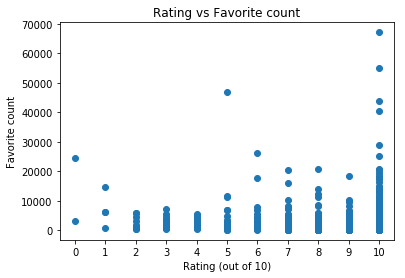

In [83]:
plt.scatter(df.query('rating <=10')['rating'],df.query('rating <=10')['Favorite_count']);
plt.title("Rating vs Favorite count");
plt.xlabel("Rating (out of 10)");
plt.xticks(range(11));
plt.ylabel("Favorite count");

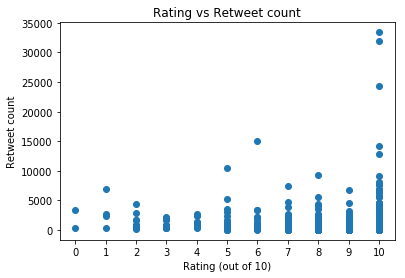

In [84]:
plt.scatter(df.query('rating <=10')['rating'],df.query('rating <=10')['Retweet_count']);
plt.title("Rating vs Retweet count");
plt.xlabel("Rating (out of 10)");
plt.xticks(range(11));
plt.ylabel("Retweet count");

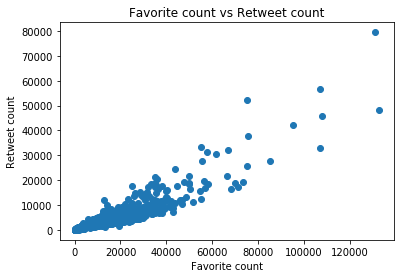

In [85]:
plt.scatter(df['Favorite_count'],df['Retweet_count']);
plt.title("Favorite count vs Retweet count");
plt.ylabel("Retweet count");
plt.xlabel("Favorite count");